In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)

import numpy as np

In [2]:
game_filenames = [r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2009.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2010.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2011.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2012.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2013.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2014.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2015.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2016.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2017.csv']

game_headers = ['game_id', 'date', 'game_number', 'weekday', 'start_time', 'dh_used', 'day_night','visiting_team',
                'home_team', 'game_site', 'vis_starting_pitcher', 'home_starting_pitcher','home_plate_ump','base1_ump',
                'base2_ump', 'base3_ump','lf_ump', 'rf_ump', 'attendance','ps_scorer', 'translator', 'inputter',
                'input_time', 'edit_time', 'how_scored', 'pitches_entered', 'temperature', 'wind_dir', 'wind_speed',
                'field_cond','precipitation','sky', 'duration', 'total_innings', 'vis_final', 'home_final', 'vis_hits', 'home_hits',
                'vis_errors','home_errors','vis_lob', 'home_lob', 'winning_pitcher', 'losing_pitcher', 'save', 'gw_rbi', 
                'vis_batter1', 'vis_batter1_pos', 'vis_batter2', 'vis_batter2_pos', 'vis_batter3', 'vis_batter3_pos',
                'vis_batter4', 'vis_batter4_pos', 'vis_batter5', 'vis_batter5_pos', 'vis_batter6', 'vis_batter6_pos',
                'vis_batter7', 'vis_batter7_pos', 'vis_batter8', 'vis_batter8_pos', 'vis_batter9', 'vis_batter9_pos',
                'home_batter1', 'home_batter1_pos', 'home_batter2', 'home_batter2_pos', 'home_batter3', 'home_batter3_pos',
                'home_batter4', 'home_batter4_pos', 'home_batter5', 'home_batter5_pos', 'home_batter6', 'home_batter6_pos', 
                'home_batter7', 'home_batter7_pos', 'home_batter8', 'home_batter8_pos', 'home_batter9', 'home_batter9_pos',
                'vis_finishing_pitcher', 'home_finishing_pitcher']

game_data = []
for filename in game_filenames:
    if not game_data:
        all_games = pd.DataFrame(pd.read_csv(filename, low_memory=False, 
                        header=0, names=game_headers, index_col=False))
        game_data = [0]
    else:
        all_games_tmp = pd.DataFrame(pd.read_csv(filename, low_memory=False, 
                        header=0, names=game_headers, index_col=False))
        all_games = all_games.append(all_games_tmp)
        del(all_games_tmp)
del(game_data)

teams_match = {'ANA':'LAA', 'ARI':'ARI', 'ATL':'ATL', 'BAL':'BAL', 'BOS':'BOS', 'CHA':'CWS', 'CHN':'CHC', 'CIN':'CIN',
               'CLE':'CLE','COL':'COL', 'DET':'DET', 'FLO':'MIA', 'HOU':'HOU', 'KCA':'KC', 'LAN':'LAD','MIA':'MIA', 
               'MIL':'MIL','MIN':'MIN', 'NYA':'NYY', 'NYN':'NYM', 'OAK':'OAK', 'PHI':'PHI','PIT':'PIT', 'SDN':'SD', 
               'SEA':'SEA','SFN':'SF', 'SLN':'STL', 'TBA':'TB', 'TEX':'TEX', 'TOR':'TOR', 'WAS':'WSH'}

all_games['date'] = pd.to_datetime(all_games['game_id'].str[3:11], format='%Y-%m-%d')
all_games['odds_matchup'] = (all_games['date'].astype(str) + '-' + all_games['home_team'].map(teams_match)).astype(str) + '-' + (all_games['visiting_team'].map(teams_match)).astype(str)
all_games['season'] = all_games['odds_matchup'].str[:4]

In [3]:
pwl = all_games[['season', 'game_id', 'odds_matchup', 'date', 'home_final', 'vis_final','home_team', 'visiting_team']]

In [4]:
winner = []
loser = []
win_runs = []
loser_runs = []

for index, row in pwl.iterrows():
    if row['home_final'] > row['vis_final']:
        w = row['home_team']
        l = row['visiting_team']
        wr = row['home_final']
        lr = row['vis_final']
    else:
        w = row['visiting_team']
        l = row['home_team']
        wr = row['vis_final']
        lr = row['home_final']
    winner.append(w)
    loser.append(l)
    win_runs.append(wr)
    loser_runs.append(lr)

pwl['winning_team'] = winner
pwl['losing_team'] = loser
pwl['winning_runs'] = win_runs
pwl['losing_runs'] = loser_runs

C:\Users\mendo\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mendo\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mendo\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [5]:
pwl = pwl[['game_id', 'date', 'odds_matchup', 'season', 'winning_team', 'losing_team', 'winning_runs', 'losing_runs']]
pwl['winner'] = pwl['winning_team'] + '-' + pwl['winning_runs'].astype(str)
pwl['loser'] =  pwl['losing_team'] + '-' + pwl['losing_runs'].astype(str)
pwl_w = pwl[['game_id', 'winner']]
pwl_l = pwl[['game_id', 'loser']]

In [6]:
h = pwl[['date', 'season', 'game_id', 'winning_team']]
h.columns = ['date', 'season', 'game_id', 'team']
v = pwl[['date', 'season', 'game_id', 'losing_team']]
v.columns = ['date', 'season', 'game_id', 'team']

records = h.append(v).sort_values(['date', 'game_id'])
records = records.merge(pwl_w, how='left', on='game_id').merge(pwl_l, how='left', on='game_id')
records['win_team'] = records['winner'].str[:3].astype(str)
records['team'] = records['team'].astype(str)
records = records.drop_duplicates()

records['win_runs'] = records['winner'].str[4:]
records['lose_runs'] = records['loser'].str[4:]

In [7]:
win = []
loss = []
runs_scored = []
runs_allowed = []

for index, row in records.iterrows():
    if row['team'] == row['win_team']:
        wt = 1
        lt = 0
        rs = row['win_runs']
        ra = row['lose_runs']
    else:
        wt = 0
        lt = 1
        rs = row['lose_runs']
        ra = row['win_runs']
    win.append(wt)
    loss.append(lt)
    runs_scored.append(rs)
    runs_allowed.append(ra)

records['win'] = win
records['loss'] = loss
records['runs_scored'] = runs_scored
records['runs_allowed'] = runs_allowed

In [8]:
records = records[['date', 'season', 'game_id', 'team', 'win', 'loss', 'runs_scored', 'runs_allowed']]
records['team'] = records['team'].map(teams_match)
records['season_team'] = records['season'] + '-' + records['team']

In [9]:
records['r_wins'] = records.groupby('season_team')['win'].cumsum()
records['r_losses'] = records.groupby('season_team')['loss'].cumsum()

records['runs_scored'] = records['runs_scored'].astype(int)
records['runs_allowed'] = records['runs_allowed'].astype(int)
records['r_runs_scored'] = records.groupby('season_team')['runs_scored'].cumsum()
records['r_runs_allowed'] = records.groupby('season_team')['runs_allowed'].cumsum()

In [10]:
records['games'] = 1
records['games_played'] = records.groupby('season_team')['games'].cumsum()
records['win_percentage'] = records['r_wins'] / records['games_played']
records['p_win_percentage'] = records['r_runs_scored']**1.83 / (records['r_runs_scored']**1.83 + records['r_runs_allowed']**1.83)

records['expected_wins'] = (records['p_win_percentage'] * records['games_played']).round(0)
records['expected_losses'] = ((1 - records['p_win_percentage']) * records['games_played']).round(0)
records['win_difference'] = records['r_wins'] - records['expected_wins']

In [11]:
division_dict = {'2009-ATL':'NL-East', '2009-PHI':'NL-East', '2009-ARI':'NL-West', '2009-COL':'NL-West', '2009-BAL':'AL-East',
       '2009-NYY':'AL-East', '2009-NYM':'NL-East', '2009-CIN':'NL-Central', '2009-MIA':'NL-East', '2009-WSH':'NL-East',
       '2009-CHC':'NL-Central', '2009-HOU':'NL-Central', '2009-SEA':'AL-West', '2009-MIN':'AL-Central', '2009-LAD':'NL-West',
       '2009-SD':'NL-West', '2009-PIT':'NL-Central', '2009-STL':'NL-Central', '2009-TEX':'AL-West', '2009-CLE':'AL-Central',
       '2009-TOR':'AL-East', '2009-DET':'AL-Central', '2009-OAK':'AL-West', '2009-LAA':'AL-West', '2009-BOS':'AL-East',
       '2009-TB':'AL-East', '2009-CWS':'AL-Central', '2009-KC':'AL-Central', '2009-SF':'NL-West', '2009-MIL':'NL-Central',
       '2010-BOS':'AL-East', '2010-NYY':'AL-East', '2010-ARI':'NL-West', '2010-SD':'NL-West', '2010-ATL':'NL-East',
       '2010-CHC':'NL-Central', '2010-CWS':'AL-Central', '2010-CLE':'AL-Central', '2010-STL':'NL-Central', '2010-CIN':'NL-Central',
       '2010-SF':'NL-West', '2010-HOU':'NL-Central', '2010-DET':'AL-Central', '2010-KC':'AL-Central', '2010-COL':'NL-West',
       '2010-MIL':'NL-Central', '2010-NYM':'NL-East', '2010-MIA':'NL-East', '2010-SEA':'AL-West', '2010-OAK':'AL-West',
       '2010-PIT':'NL-Central', '2010-LAD':'NL-West', '2010-TEX':'AL-West', '2010-TOR':'AL-East', '2010-PHI':'NL-East',
       '2010-WSH':'NL-East', '2010-MIN':'AL-Central', '2010-LAA':'AL-West', '2010-TB':'AL-East', '2010-BAL':'AL-East',
       '2011-CIN':'NL-Central', '2011-MIL':'NL-Central', '2011-LAA':'AL-West', '2011-KC':'AL-Central', '2011-LAD':'NL-West',
       '2011-SF':'NL-West', '2011-NYY':'AL-East', '2011-DET':'AL-Central', '2011-SD':'NL-West', '2011-STL':'NL-Central',
       '2011-ATL':'NL-East', '2011-WSH':'NL-East', '2011-PIT':'NL-Central', '2011-CHC':'NL-Central', '2011-CWS':'AL-Central',
       '2011-CLE':'AL-Central', '2011-ARI':'NL-West', '2011-COL':'NL-West', '2011-MIA':'NL-East', '2011-NYM':'NL-East',
       '2011-SEA':'AL-West', '2011-OAK':'AL-West', '2011-PHI':'NL-East', '2011-HOU':'NL-Central', '2011-BAL':'AL-East',
       '2011-TB':'AL-East', '2011-TEX':'AL-West', '2011-BOS':'AL-East', '2011-TOR':'AL-East', '2011-MIN':'AL-Central',
       '2012-SEA':'AL-West', '2012-OAK':'AL-West', '2012-STL':'NL-Central', '2012-MIA':'NL-East', '2012-WSH':'NL-East',
       '2012-CHC':'NL-Central', '2012-CIN':'NL-Central', '2012-TOR':'AL-East', '2012-CLE':'AL-Central', '2012-DET':'AL-Central',
       '2012-BOS':'AL-East', '2012-NYM':'NL-East', '2012-ATL':'NL-East', '2012-PHI':'NL-East', '2012-PIT':'NL-Central',
       '2012-LAD':'NL-West', '2012-SD':'NL-West', '2012-ARI':'NL-West', '2012-SF':'NL-West', '2012-BAL':'AL-East',
       '2012-MIN':'AL-Central', '2012-COL':'NL-West', '2012-HOU':'NL-Central', '2012-MIL':'NL-Central', '2012-TB':'AL-East',
       '2012-NYY':'AL-East', '2012-TEX':'AL-West', '2012-CWS':'AL-Central', '2012-KC':'AL-Central', '2012-LAA':'AL-West',
       '2013-HOU':'AL-West', '2013-TEX':'AL-West', '2013-ARI':'NL-West', '2013-STL':'NL-Central', '2013-ATL':'NL-East',
       '2013-PHI':'NL-East', '2013-CWS':'AL-Central', '2013-KC':'AL-Central', '2013-LAA':'AL-West', '2013-CIN':'NL-Central',
       '2013-LAD':'NL-West', '2013-SF':'NL-West', '2013-MIL':'NL-Central', '2013-COL':'NL-West', '2013-DET':'AL-Central',
       '2013-MIN':'AL-Central', '2013-BOS':'AL-East', '2013-NYY':'AL-East', '2013-NYM':'NL-East', '2013-SD':'NL-West',
       '2013-SEA':'AL-West', '2013-OAK':'AL-West', '2013-CHC':'NL-Central', '2013-PIT':'NL-Central', '2013-WSH':'NL-East',
       '2013-MIA':'NL-East', '2013-BAL':'AL-East', '2013-TB':'AL-East', '2013-CLE':'AL-Central', '2013-TOR':'AL-East',
       '2014-LAD':'NL-West', '2014-ARI':'NL-West', '2014-SD':'NL-West', '2014-SF':'NL-West', '2014-BAL':'AL-East',
       '2014-BOS':'AL-East', '2014-CWS':'AL-Central', '2014-MIN':'AL-Central', '2014-STL':'NL-Central', '2014-CIN':'NL-Central',
       '2014-DET':'AL-Central', '2014-KC':'AL-Central', '2014-MIA':'NL-East', '2014-COL':'NL-West', '2014-MIL':'NL-Central',
       '2014-ATL':'NL-East', '2014-WSH':'NL-East', '2014-NYM':'NL-East', '2014-CLE':'AL-Central', '2014-OAK':'AL-West',
       '2014-PIT':'NL-Central', '2014-CHC':'NL-Central', '2014-TB':'AL-East', '2014-TOR':'AL-East', '2014-PHI':'NL-East',
       '2014-TEX':'AL-West', '2014-SEA':'AL-West', '2014-LAA':'AL-West', '2014-HOU':'AL-West', '2014-NYY':'AL-East',
       '2015-STL':'NL-Central', '2015-CHC':'NL-Central', '2015-SF':'NL-West', '2015-ARI':'NL-West', '2015-CIN':'NL-Central',
       '2015-PIT':'NL-Central', '2015-DET':'AL-Central', '2015-MIN':'AL-Central', '2015-HOU':'AL-West', '2015-CLE':'AL-Central',
       '2015-KC':'AL-Central', '2015-CWS':'AL-Central', '2015-LAD':'NL-West', '2015-SD':'NL-West', '2015-ATL':'NL-East',
       '2015-MIA':'NL-East', '2015-COL':'NL-West', '2015-MIL':'NL-Central', '2015-TOR':'AL-East', '2015-NYY':'AL-East',
       '2015-OAK':'AL-West', '2015-TEX':'AL-West', '2015-BOS':'AL-East', '2015-PHI':'NL-East', '2015-SEA':'AL-West',
       '2015-LAA':'AL-West', '2015-BAL':'AL-East', '2015-TB':'AL-East', '2015-NYM':'NL-East', '2015-WSH':'NL-East',
       '2016-KC':'AL-Central', '2016-NYM':'NL-East', '2016-PIT':'NL-Central', '2016-STL':'NL-Central', '2016-TOR':'AL-East',
       '2016-TB':'AL-East', '2016-COL':'NL-West', '2016-ARI':'NL-West', '2016-WSH':'NL-East', '2016-ATL':'NL-East',
       '2016-BAL':'AL-East', '2016-MIN':'AL-Central', '2016-CIN':'NL-Central', '2016-PHI':'NL-East', '2016-SF':'NL-West',
       '2016-MIL':'NL-Central', '2016-CWS':'AL-Central', '2016-OAK':'AL-West', '2016-LAD':'NL-West', '2016-SD':'NL-West',
       '2016-TEX':'AL-West', '2016-SEA':'AL-West', '2016-CHC':'NL-Central', '2016-LAA':'AL-West', '2016-BOS':'AL-East',
       '2016-CLE':'AL-Central', '2016-DET':'AL-Central', '2016-MIA':'NL-East', '2016-HOU':'AL-West', '2016-NYY':'AL-East',
       '2017-ARI':'NL-West', '2017-SF':'NL-West', '2017-STL':'NL-Central', '2017-CHC':'NL-Central', '2017-TB':'AL-East',
       '2017-NYY':'AL-East', '2017-BAL':'AL-East', '2017-TOR':'AL-East', '2017-BOS':'AL-East', '2017-PIT':'NL-Central',
       '2017-PHI':'NL-East', '2017-CIN':'NL-Central', '2017-HOU':'AL-West', '2017-SEA':'AL-West', '2017-LAD':'NL-West',
       '2017-SD':'NL-West', '2017-COL':'NL-West', '2017-MIL':'NL-Central', '2017-MIN':'AL-Central', '2017-KC':'AL-Central',
       '2017-NYM':'NL-East', '2017-ATL':'NL-East', '2017-OAK':'AL-West', '2017-LAA':'AL-West', '2017-CLE':'AL-Central',
       '2017-TEX':'AL-West', '2017-WSH':'NL-East', '2017-MIA':'NL-East', '2017-DET':'AL-Central', '2017-CWS':'AL-Central'}

records['division'] = records['season_team'].map(division_dict)

In [12]:
team_colors_dict = {'ARI':'#A71930', 'ATL':'#CF1141', 'BAL':'#DF4601', 'BOS':'#C60C30', 'CHC':'#0E3386', 
                   'CWS':'#000000', 'CIN':'#C6011F', 'CLE':'#D7038B', 'COL':'#220F5D', 'DET':'#062343',
                   'HOU':'#E57200', 'KC':'#002C74', 'LAA':'#B90020', 'LAD':'#223B75', 'MIA':'#F26533',
                   'MIL':'#162B48', 'MIN':'#B41234', 'NYM':'#002D72', 'NYY':'#001C43', 'OAK':'#EFB21E',
                   'PHI':'#D41244', 'PIT':'#FCB827', 'SD':'#042C61', 'SF':'#FF4819', 'STL':'#CD1141',
                   'SEA':'#005B5C', 'TB':'#95C0F7', 'TEX':'#BC032B', 'TOR':'#0476BF', 'WSH':'#BA122B'}

In [13]:
records = records.sort_values(['season', 'division', 'game_id'])
records['win_difference'] = records['win_difference'].astype(int)
records

,date,season,game_id,team,win,loss,runs_scored,runs_allowed,season_team,r_wins,r_losses,r_runs_scored,r_runs_allowed,games,games_played,win_percentage,p_win_percentage,expected_wins,expected_losses,win_difference,division
375,2009-04-21,2009,ANA200904210,DET,0,1,3,4,2009-DET,7,6,72,55,1,13,0.538462,0.620784,8.0,5.0,-1,AL-Central
402,2009-04-22,2009,ANA200904220,DET,1,0,12,10,2009-DET,8,6,84,65,1,14,0.571429,0.615210,9.0,5.0,-1,AL-Central
435,2009-04-23,2009,ANA200904230,DET,0,1,5,10,2009-DET,8,7,89,75,1,15,0.533333,0.577666,9.0,6.0,-1,AL-Central
847,2009-05-08,2009,ANA200905080,KC,0,1,1,4,2009-KC,18,12,143,114,1,30,0.600000,0.602229,18.0,12.0,0,AL-Central
877,2009-05-09,2009,ANA200905090,KC,0,1,0,1,2009-KC,18,13,143,115,1,31,0.580645,0.598394,19.0,12.0,-1,AL-Central
907,2009-05-10,2009,ANA200905100,KC,0,1,3,4,2009-KC,18,14,146,119,1,32,0.562500,0.592474,19.0,13.0,-1,AL-Central
1310,2009-05-25,2009,ANA200905250,CWS,1,0,17,3,2009-CWS,20,24,184,212,1,44,0.454545,0.435555,19.0,25.0,1,AL-Central
1340,2009-05-26,2009,ANA200905260,CWS,1,0,4,2,2009-CWS,21,24,188,214,1,45,0.466667,0.441014,20.0,25.0,1,AL-Central
1371,2009-05-27,2009,ANA200905270,CWS,0,1,1,3,2009-CWS,21,25,189,217,1,46,0.456522,0.437131,20.0,26.0,1,AL-Central
2827,2009-07-23,2009,ANA200907230,MIN,0,1,5,6,2009-MIN,48,48,466,450,1,96,0.500000,0.515979,50.0,46.0,-2,AL-Central


In [14]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
sns.set()

C:\Users\mendo\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


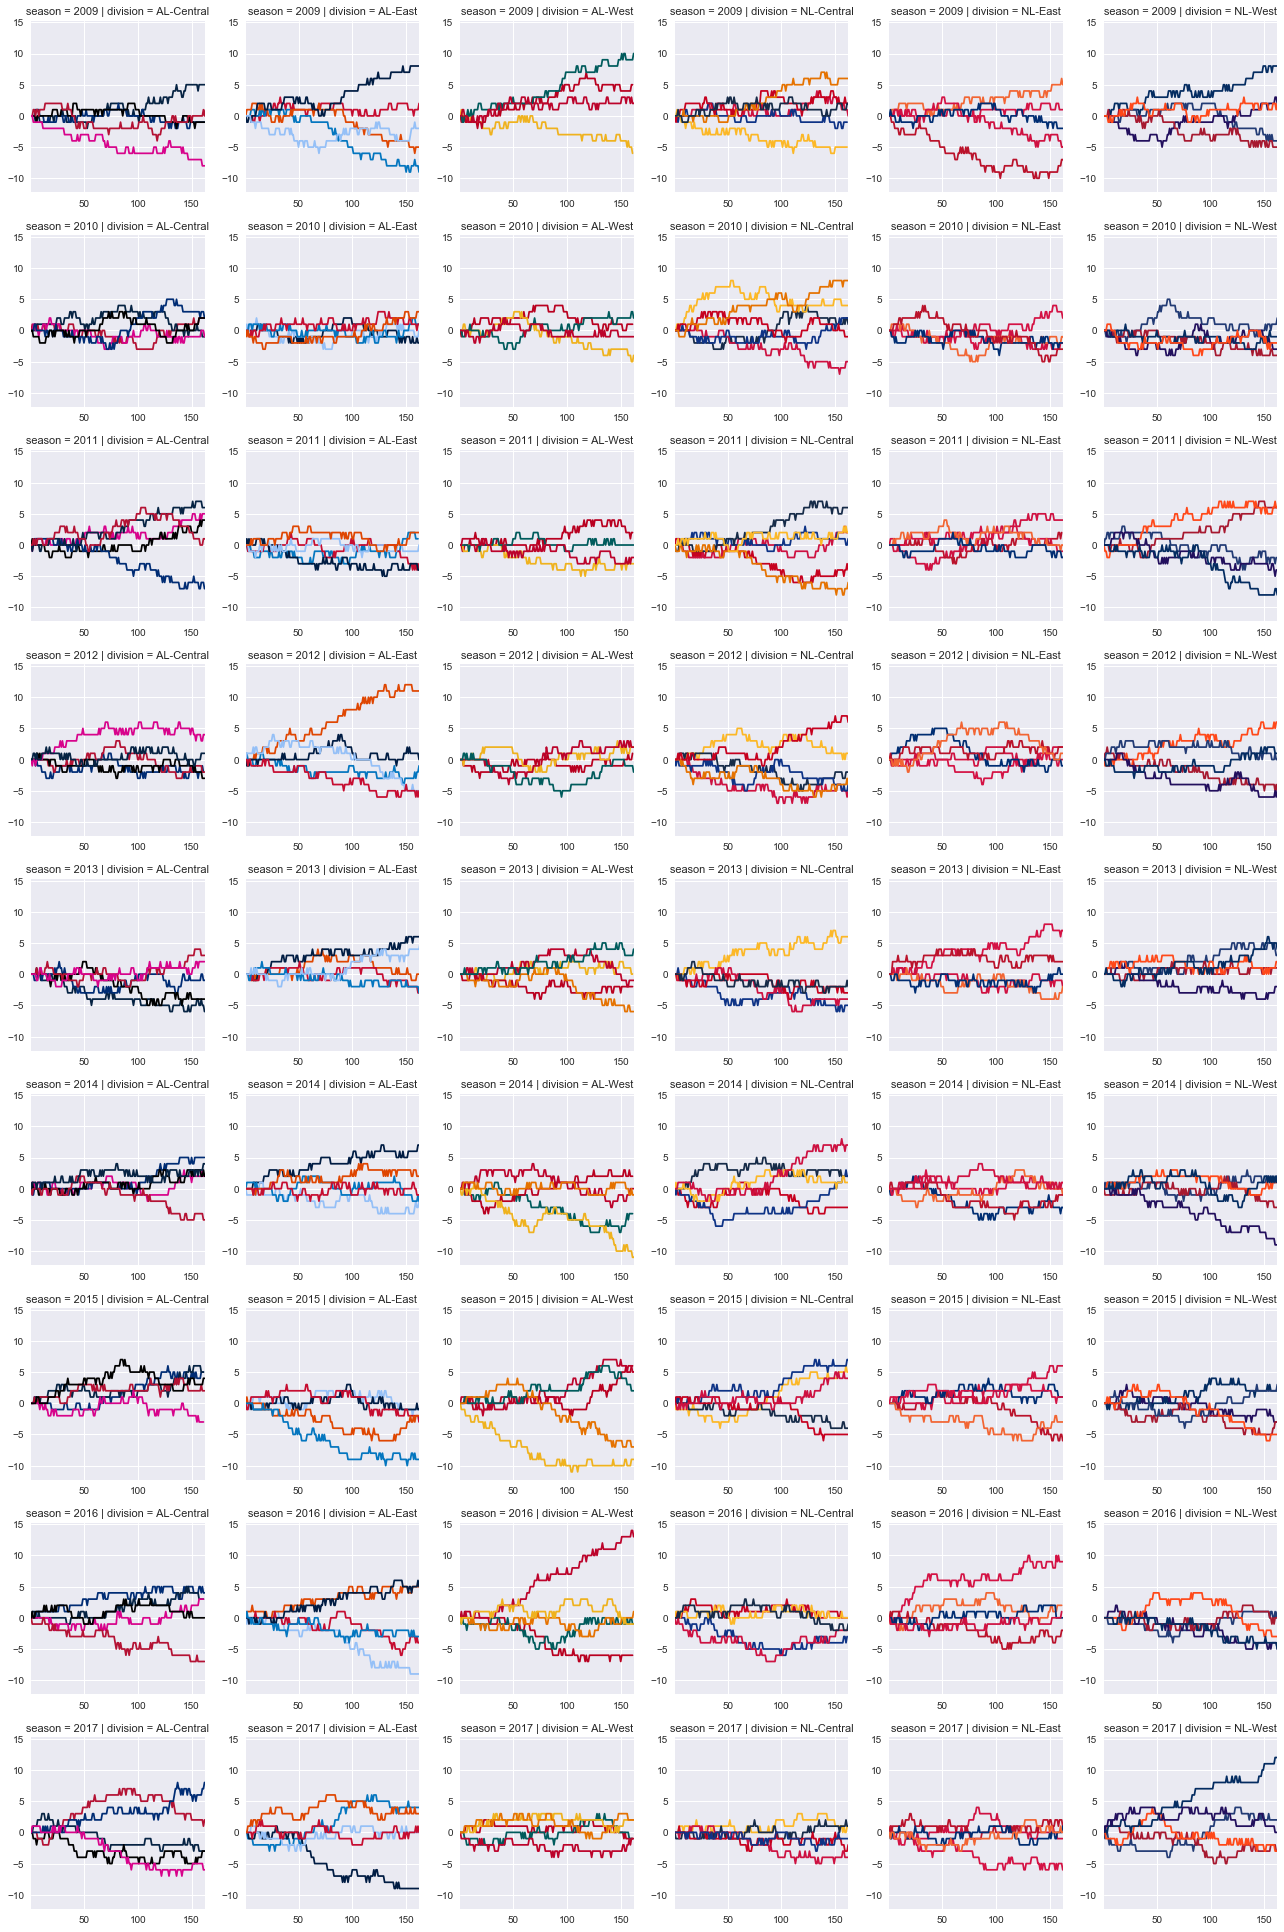

In [15]:
w_diff = sns.FacetGrid(records, col="division", row='season')
w_diff = w_diff.map_dataframe(sns.tsplot, time='games_played', value='win_difference', unit='division',
          condition='team', data=records, color=team_colors_dict)
plt.tight_layout()
plt.show()

C:\Users\mendo\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


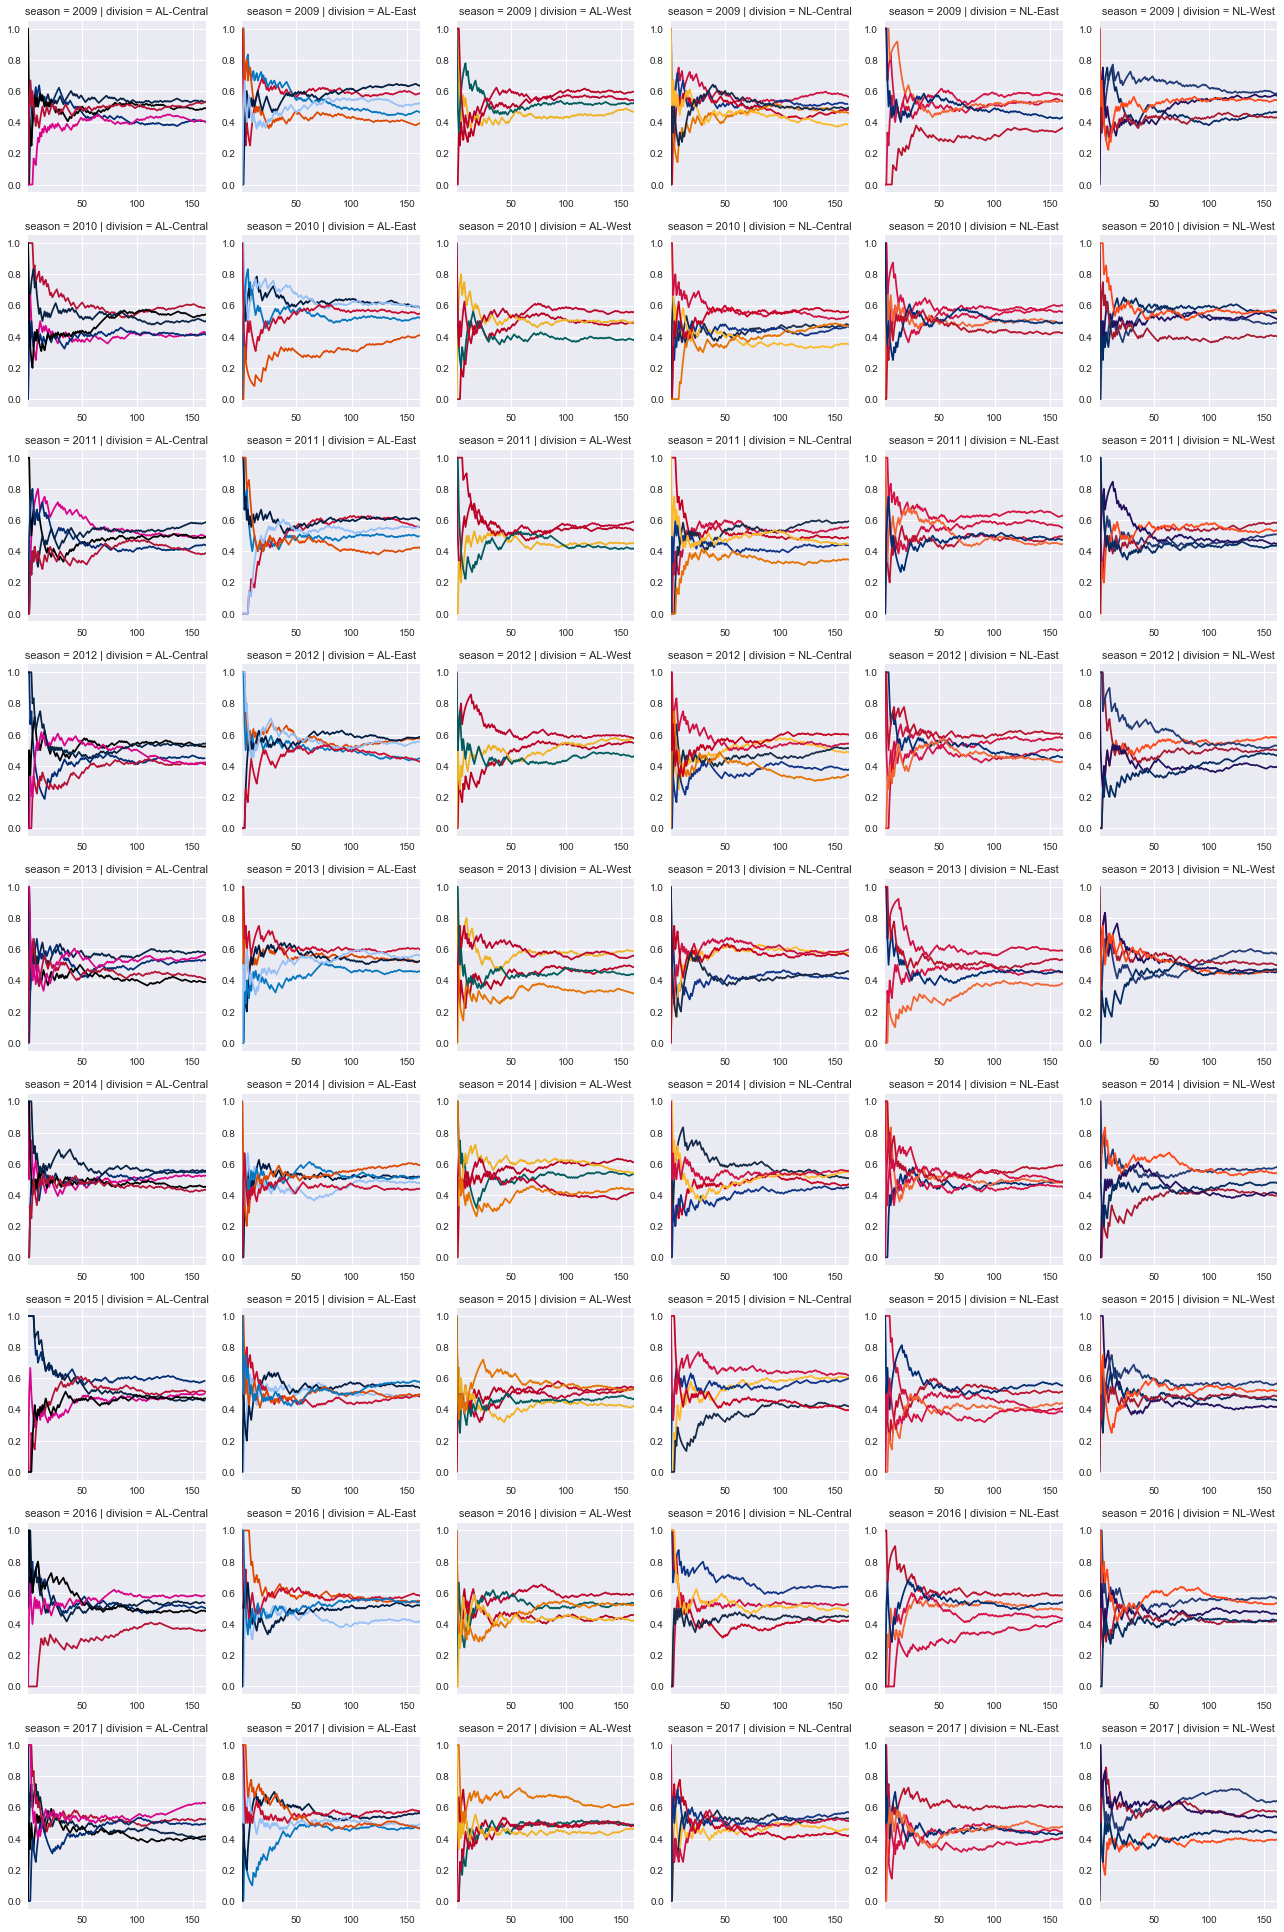

In [16]:
t_wins = sns.FacetGrid(records, col="division", row='season')
t_wins = t_wins.map_dataframe(sns.tsplot, time='games_played', value='win_percentage', unit='division',
          condition='team', data=records, color=team_colors_dict)
plt.tight_layout()
plt.show()

In [17]:
s_2009 = records[records['season']=='2009']
s_2010 = records[records['season']=='2010']
s_2011 = records[records['season']=='2011']
s_2012 = records[records['season']=='2012']
s_2013 = records[records['season']=='2013']
s_2014 = records[records['season']=='2014']
s_2015 = records[records['season']=='2015']
s_2016 = records[records['season']=='2016']
s_2017 = records[records['season']=='2017']

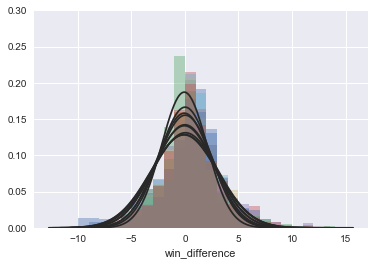

In [18]:
diff_dist_2009 = sns.distplot(s_2009['win_difference'], bins=(s_2009['win_difference'].max() - s_2009['win_difference'].min()), fit=norm, kde=False).set_ylim([0,.3])
diff_dist_2010 = sns.distplot(s_2010['win_difference'], bins=(s_2010['win_difference'].max() - s_2010['win_difference'].min()), fit=norm, kde=False).set_ylim([0,.3])
diff_dist_2011 = sns.distplot(s_2011['win_difference'], bins=(s_2011['win_difference'].max() - s_2011['win_difference'].min()), fit=norm, kde=False).set_ylim([0,.3])
diff_dist_2012 = sns.distplot(s_2012['win_difference'], bins=(s_2012['win_difference'].max() - s_2012['win_difference'].min()), fit=norm, kde=False).set_ylim([0,.3])
diff_dist_2013 = sns.distplot(s_2013['win_difference'], bins=(s_2013['win_difference'].max() - s_2013['win_difference'].min()), fit=norm, kde=False).set_ylim([0,.3])
diff_dist_2014 = sns.distplot(s_2014['win_difference'], bins=(s_2014['win_difference'].max() - s_2014['win_difference'].min()), fit=norm, kde=False).set_ylim([0,.3])
diff_dist_2015 = sns.distplot(s_2015['win_difference'], bins=(s_2015['win_difference'].max() - s_2015['win_difference'].min()), fit=norm, kde=False).set_ylim([0,.3])
diff_dist_2016 = sns.distplot(s_2016['win_difference'], bins=(s_2016['win_difference'].max() - s_2016['win_difference'].min()), fit=norm, kde=False).set_ylim([0,.3])
diff_dist_2017 = sns.distplot(s_2017['win_difference'], bins=(s_2017['win_difference'].max() - s_2017['win_difference'].min()), fit=norm, kde=False).set_ylim([0,.3])
plt.legend()
plt.show()

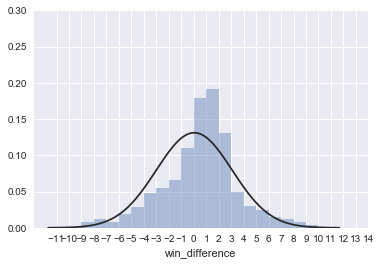

In [19]:
diff_dist_2009 = sns.distplot(s_2009['win_difference'], bins=(s_2009['win_difference'].max() - s_2009['win_difference'].min()), fit=norm, kde=False).set_ylim([0,.3])
plt.xticks([-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.show()

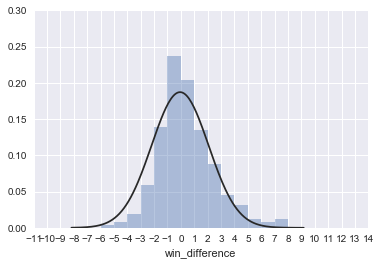

In [20]:
diff_dist_2010 = sns.distplot(s_2010['win_difference'], bins=(s_2010['win_difference'].max() - s_2010['win_difference'].min()), fit=norm, kde=False).set_ylim([0,.3])
plt.xticks([-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.show()

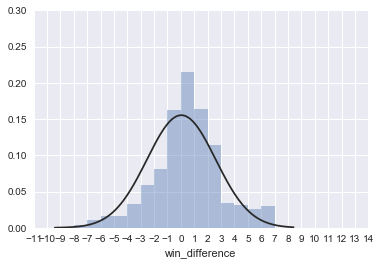

In [21]:
diff_dist_2011 = sns.distplot(s_2011['win_difference'], bins=(s_2011['win_difference'].max() - s_2011['win_difference'].min()), fit=norm, kde=False).set_ylim([0,.3])
plt.xticks([-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.show()

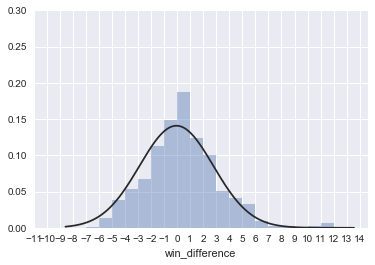

In [22]:
diff_dist_2012 = sns.distplot(s_2012['win_difference'], bins=(s_2012['win_difference'].max() - s_2012['win_difference'].min()), fit=norm, kde=False).set_ylim([0,.3])
plt.xticks([-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.show()

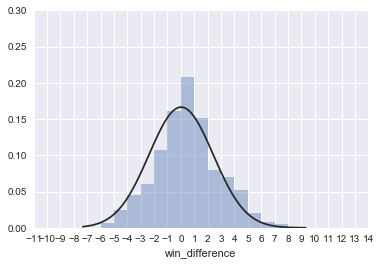

In [23]:
diff_dist_2013 = sns.distplot(s_2013['win_difference'], bins=(s_2013['win_difference'].max() - s_2013['win_difference'].min()), fit=norm, kde=False).set_ylim([0,.3])
plt.xticks([-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.show()

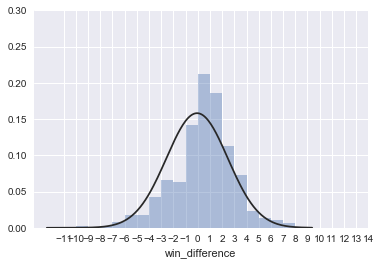

In [24]:
diff_dist_2014 = sns.distplot(s_2014['win_difference'], bins=(s_2014['win_difference'].max() - s_2014['win_difference'].min()), fit=norm, kde=False).set_ylim([0,.3])
plt.xticks([-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.show()

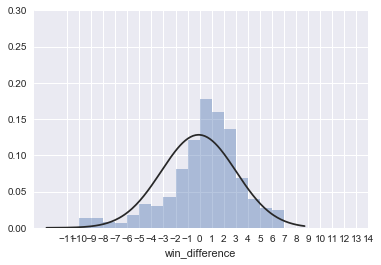

In [25]:
diff_dist_2015 = sns.distplot(s_2015['win_difference'], bins=(s_2015['win_difference'].max() - s_2015['win_difference'].min()), fit=norm, kde=False).set_ylim([0,.3])
plt.xticks([-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.show()

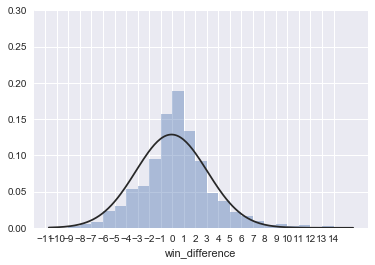

In [26]:
diff_dist_2016 = sns.distplot(s_2016['win_difference'], bins=(s_2016['win_difference'].max() - s_2016['win_difference'].min()), fit=norm, kde=False).set_ylim([0,.3])
plt.xticks([-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.show()

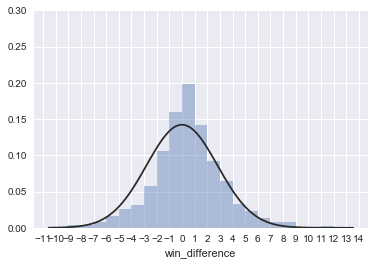

In [27]:
diff_dist_2017 = sns.distplot(s_2017['win_difference'], bins=(s_2017['win_difference'].max() - s_2017['win_difference'].min()), fit=norm, kde=False).set_ylim([0,.3])
plt.xticks([-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.show()

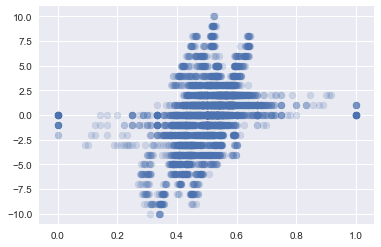

In [28]:
plt.scatter(s_2009['win_percentage'], s_2009['win_difference'], alpha=.2)
plt.show()

In [29]:
batter_summary = pd.read_csv(r'C:\\Users\\mendo\\Desktop\\batter_summary.csv', sep=',', header=0, low_memory=False, index_col=0)
batter_summary

,bat_game_id,bat_batting_team_id,bat_balls_in_plate_app,bat_called_balls_plate_app,bat_int_balls_plate_app,bat_pitchout_plate_app,bat_hit_batter_plate_app,bat_other_balls_plate_app,bat_strikes_in_plate_app,bat_called_strikes_plate_app,bat_swinging_strike_plate_app,bat_foul_strike_plate_app,bat_other_strikes_plate_app,bat_runs_on_play,bat_unknown,bat_none,bat_generic_out,bat_strikeout,bat_stolen_base,bat_defensive_indifference,bat_caught_stealing,bat_pickoff_error,bat_pickoff,bat_wild_pitch,bat_passed_ball,bat_balk,bat_out_advancing,bat_foul_error,bat_walk,bat_intentional_walk,bat_hit_by_pitch,bat_interference,bat_error,bat_fielders_choice,bat_single,bat_double,bat_triple,bat_home_run,bat_missing_play,bat_groundball,bat_flyball,bat_popup,bat_linedrive,bat_batter_scored
0,ANA200904060,ANA,39,0,0,0,0,82,19,7,29,27,0,3,0,0,18,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,1,0,1,0,8,10,3,6,3
1,ANA200904060,OAK,47,0,0,1,0,71,21,6,18,26,0,0,0,0,21,2,0,0,1,0,0,0,0,0,0,0,2,0,1,0,1,1,2,1,0,0,0,11,8,5,2,0
2,ANA200904070,ANA,73,1,0,0,0,96,30,16,21,29,0,4,0,0,19,6,1,1,1,0,0,1,0,0,0,0,5,1,0,0,1,1,4,4,0,0,0,12,12,2,3,3
3,ANA200904070,OAK,56,0,0,0,0,112,34,10,30,38,0,6,0,0,22,5,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,12,4,0,0,0,13,13,6,6,6
4,ANA200904080,ANA,58,0,0,0,0,103,29,16,31,27,0,4,0,0,17,9,1,0,0,0,0,1,0,0,0,0,3,0,0,0,1,0,8,1,0,0,0,17,4,3,3,3
5,ANA200904080,OAK,65,0,0,0,0,108,40,13,22,33,0,6,0,0,17,9,1,0,0,0,0,2,0,0,0,0,4,0,0,0,0,1,15,0,0,0,0,13,12,0,8,6
6,ANA200904100,ANA,62,4,0,1,0,78,30,10,10,28,0,6,0,0,18,5,4,0,0,0,0,0,0,0,0,0,5,1,1,0,0,0,8,2,0,0,0,13,9,4,2,6
7,ANA200904100,BOS,48,0,0,0,0,87,22,11,32,22,0,3,0,0,15,10,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,6,1,0,0,0,7,10,1,4,1
8,ANA200904110,ANA,56,0,0,0,0,99,22,11,36,30,0,4,0,0,22,4,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,2,3,0,3,0,15,11,2,2,4
9,ANA200904110,BOS,49,0,0,0,0,69,23,2,14,30,0,5,0,0,22,2,1,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,4,1,0,3,0,11,16,1,2,5


In [30]:
pitch_summary = pd.read_csv(r'C:\\Users\\mendo\\Desktop\\pitch_summary.csv', sep=',', header=0, low_memory=False, index_col=0)
pitch_summary

,date,game_id,fielding_team_id,s_pitcher,s_pitcher_hand,s_starter,s_earned_runs,s_errors,s_balls,s_called_balls,s_int_balls,s_pitchout,s_hit_batter,s_other_balls,s_strikes,s_called_strikes,s_swinging_strike,s_foul_strike,s_other_strikes,s_unknown,s_none,s_generic_out,s_strikeout,s_stolen_base,s_defensive_indifference,s_caught_stealing,s_pickoff_error,s_pickoff,s_wild_pitch,s_passed_ball,s_balk,s_out_advancing,s_foul_error,s_walk,s_intentional_walk,s_hit_by_pitch,s_interference,s_error,s_fielders_choice,s_single,s_double,s_triple,s_home_run,s_missing_play,s_outs,b_pitcher,b_earned_runs,b_starter,b_errors,b_balls,b_called_balls,b_int_balls,b_pitchout,b_hit_batter,b_other_balls,b_strikes,b_called_strikes,b_swinging_strike,b_foul_strike,b_other_strikes,b_unknown,b_none,b_generic_out,b_strikeout,b_stolen_base,b_defensive_indifference,b_caught_stealing,b_pickoff_error,b_pickoff,b_wild_pitch,b_passed_ball,b_balk,b_out_advancing,b_foul_error,b_walk,b_intentional_walk,b_hit_by_pitch,b_interference,b_error,b_fielders_choice,b_single,b_double,b_triple,b_home_run,b_missing_play,b_outs,s_groundball,s_flyball,s_popup,s_linedrive,b_groundball,b_flyball,b_popup,b_linedrive
0,2009-04-05,PHI200904050,ATL,lowed001,R,T,0,0,31,0,0,0,0,66,21,6,17,22,0,0,0,20,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,24,bullpen-ATL,1,F,0,13,0,0,0,0,15,6,6,0,3,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,3,14,4,2,1,1,1,0,1
1,2009-04-05,PHI200904050,PHI,myerb001,R,T,1,0,35,4,0,0,0,58,15,9,14,20,0,0,0,12,6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,2,0,3,0,18,bullpen-PHI,0,F,0,17,0,0,0,0,23,10,4,4,5,0,0,0,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,8,5,1,5,3,1,0,1
2,2009-04-06,ANA200904060,ANA,saunj001,L,T,0,1,35,0,0,1,0,53,14,5,14,20,0,0,0,16,1,0,0,2,0,0,0,0,0,0,0,2,0,1,0,1,1,2,1,0,0,0,20,bullpen-ANA,0,F,0,12,0,0,0,0,18,7,1,4,6,0,0,0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,10,5,4,1,1,3,1,1
3,2009-04-06,ANA200904060,OAK,bradd002,L,T,2,0,31,0,0,0,0,66,13,4,25,24,0,0,0,15,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,1,0,1,0,18,bullpen-OAK,0,F,0,8,0,0,0,0,16,6,3,4,3,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,8,8,2,6,0,2,1,0
4,2009-04-06,ARI200904060,ARI,webbb001,R,T,4,0,37,0,0,1,0,44,17,4,8,15,0,0,0,10,2,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,2,2,0,2,0,12,bullpen-ARI,1,F,0,23,0,0,0,0,50,19,7,10,14,0,0,0,10,7,0,0,2,0,0,6,0,0,0,0,1,0,0,0,0,0,2,1,0,1,0,15,8,3,1,3,6,4,0,4
5,2009-04-06,ARI200904060,COL,cooka002,R,T,4,0,18,0,0,0,0,37,10,2,13,12,0,0,0,5,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,2,0,2,0,8,bullpen-COL,0,F,0,32,0,0,0,0,59,17,9,17,16,0,0,0,11,5,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0,3,0,16,4,4,0,4,6,8,0,2
6,2009-04-06,BAL200904060,BAL,guthj001,R,T,2,0,33,0,0,1,0,59,17,5,16,21,0,0,0,14,3,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,4,1,1,1,0,18,bullpen-BAL,1,F,0,21,0,0,0,0,26,6,3,6,11,0,0,0,7,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,2,1,0,1,0,9,8,9,1,3,5,4,1,1
7,2009-04-06,BAL200904060,NYA,sabac001,L,T,6,0,48,4,0,0,0,54,12,6,16,20,0,0,0,11,0,2,0,0,0,0,4,0,0,0,0,6,1,0,0,0,2,6,1,1,0,0,14,bullpen-NYA,3,F,0,31,0,0,0,0,41,11,3,15,12,0,0,0,6,2,0,0,0,0,2,2,0,0,0,0,4,0,0,0,0,0,4,2,0,1,0,10,11,6,0,3,6,3,0,3
8,2009-04-06,CIN200904060,CIN,haraa001,R,T,0,1,53,4,0,0,0,64,22,2,21,19,0,0,0,14,2,4,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,6,0,0,1,0,15,bullpen-CIN,1,F,0,27,0,0,0,0,41,21,2,6,12,0,0,0,10,1,0,0,0,0,2,0,0,0,0,0,4,0,0,0,0,0,2,1,0,0,0,12,5,9,0,5,6,3,0,3
9,2009-04-06,CIN200904060,NYN,santj003,L,T,1,1,37,0,0,0,0,62,17,16,17,12,0,0,0,9,7,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,2,1,0,0,0,17,bullpen-NYN,0,F,0,13,0,0,0,0,30,6,4,12,8,0,0,0,8,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10,2,4,2,4,5,1,1,1
